# Development of Novel Quantum Algorithms

## Team Information

Team Member 1 <br><br>

Full Name : Oguntunnbi Segun Samuel <br><br>

Womanium Program Enrollment ID:WQ24-o1IS5xmetUz4qTq

# Project Solution

### Project Tasks/ Deliverables: Evidence for the utility of quantum computing before fault tolerance

Quantum computing promises to offer substantial speed-ups over its classical counterpart for certain problems. However, the greatest impediment to realizing its full potential is noise that is inherent to these systems. 

The research paper "Evidence for the utility of quantum computing before fault tolerance" from Nature addresses several challenges and outlines significant advancements in quantum computing.

Key Problems Addressed:

1. Error Rates and Fault Tolerance:
The primary issue is the high error rates in current quantum systems, which make achieving fault tolerance (a state where quantum computations can be performed reliably despite errors) a significant hurdle. The research aims to demonstrate that quantum computing can be useful even before reaching full fault tolerance.

2. Optimization of Quantum Gates:
The paper highlights the optimization of cross-resonance-based CNOT gates, a fundamental gate in quantum circuits. By calibrating these gates at the layer level rather than individually, the researchers reduce errors and enhance the overall performance of the quantum processor.

3. Noise and Crosstalk Mitigation:
Quantum systems suffer from noise and crosstalk between qubits, which degrade the accuracy of computations. The new calibration techniques developed in this research aim to minimize these effects by carefully managing qubit interactions and gate durations.

4. Implementation of Quantum Approximate Optimization Algorithm (QAOA):
The research involves using QAOA to solve combinatorial optimization problems on noisy quantum hardware. QAOA is sensitive to noise and errors, and the paper explores strategies to optimize its performance under these conditions.

Approach and Findings:

1. Layer-Level Calibration:
The researchers developed a calibration scheme that focuses on optimizing gate layers instead of individual gates. This approach helps to synchronize the execution of gates, reducing the impact of the slowest gate on the overall speed and performance of the quantum processor.

2. Error Amplification Sequences:
Simultaneous calibration of gates using error amplification sequences ensures that gates are tuned as they will be used in actual computations, leading to more reliable and consistent performance.

3. Utility of Quantum Computing:
By demonstrating practical computations on noisy quantum hardware, the paper provides evidence that quantum computing can be useful in solving specific problems even before achieving fault tolerance. This includes optimization problems that are challenging for classical computers.

#### Using QAOA for Optimization of Quantum Gates

1. Formulate the Optimization Problem
First, you need to translate the quantum gate optimization problem into a form that QAOA can handle. This typically involves defining a cost function that quantifies the error or inefficiency of the gates.

Cost Function: Define a cost function $𝐶$ that represents the errors or performance metrics of the quantum gates. For instance, the cost function could be based on gate fidelities, decoherence times, or crosstalk effects.

2. Construct the QAOA Circuit
QAOA uses a parameterized quantum circuit consisting of two types of operators: the cost Hamiltonian and the mixing Hamiltonian.

Cost Hamiltonian $(𝐻_𝐶)$: This Hamiltonian encodes the cost function you aim to minimize. For gate optimization, $(𝐻_𝐶)$ could represent the sum of the errors in the gates.

Mixing Hamiltonian $(𝐻_𝑀)$: This Hamiltonian helps explore the solution space by applying superpositions. Typically, $(𝐻_𝑀)$ is chosen as a simple operator such as the sum of Pauli-X operators on the qubits.

In [ ]:
## Define the cost Hamiltonian for gate optimization (example: Max-Cut problem)

@qfunc
def main(x: Output[QNum], y: Output[QNum]):
    allocate(127, x)
    w = np.random.rand(n, n)

qfunc main<params_list: real[8]>(output target: qbit[5]) {
  allocate<target.len>(target);
  qaoa_penalty<target.len, params_list, hamiltonian>(target);
}


B. The key algorithmic building blocks of the chosen paper (e.g. 
Hamiltonian simulation).

To implement and optimize one of the quantum algorithms discussed in the research paper using the Classiq platform, you can follow these general steps. Let's take the Quantum Approximate Optimization Algorithm (QAOA):

In [6]:
import classiq
import numpy as np
import pyomo.core as pyo
import networkx as nx
from classiq.applications.combinatorial_optimization import (
    QAOAConfig,
)
from classiq import construct_combinatorial_optimization_model

In [4]:
# Define the Max-Cut problem on a specific graphb
graph = {
    'vertices': [0, 1, 2, 3],
    'edges': [(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)]
}

In [5]:
def mis(graph: nx.Graph) -> pyo.ConcreteModel:
    problem = pyo.ConcreteModel("mis")
    problem.x = pyo.Var(graph.nodes, domain=pyo.Binary)

    @problem.Constraint(graph.edges)
    def independent_rule(problem, node1, node2):
        return problem.x[node1] + problem.x[node2] <= 1

    problem.cost = pyo.Objective(expr=sum(list(problem.x.values())), sense=pyo.maximize)

    return problem

In [8]:
graph = nx.star_graph(4)
mis_problem = mis(graph)

In [9]:
qaoa_config = QAOAConfig(num_layers=3)
mis_model = construct_combinatorial_optimization_model(
    pyo_model=mis_problem, qaoa_config=qaoa_config
)

In [11]:
# The quantum program is obtained by synthesizing the model. You can also view the quantum program interactively.

from classiq import synthesize, show

mis_quantum_program = synthesize(mis_model)
show(mis_quantum_program)

Opening: https://platform.classiq.io/circuit/e88037a7-2edc-4eec-b52a-eb0494084936?version=0.42.2


In [12]:
from classiq import execute

res = execute(mis_quantum_program).result()

In [13]:
import pandas as pd
from classiq.applications.combinatorial_optimization import (
    get_optimization_solution_from_pyo,
)

vqe_result = res[0].value
solution = get_optimization_solution_from_pyo(
    mis_problem, vqe_result=vqe_result, penalty_energy=qaoa_config.penalty_energy
)
optimization_result = pd.DataFrame.from_records(solution)
optimization_result.sort_values(by="cost", ascending=False).head(5)

,probability,cost,solution,count
0,0.337891,4.0,"[0, 1, 1, 1, 1]",692
2,0.068359,3.0,"[0, 0, 1, 1, 1]",140
3,0.067871,3.0,"[0, 1, 1, 1, 0]",139
4,0.064453,3.0,"[0, 1, 0, 1, 1]",132
5,0.064453,3.0,"[0, 1, 1, 0, 1]",132


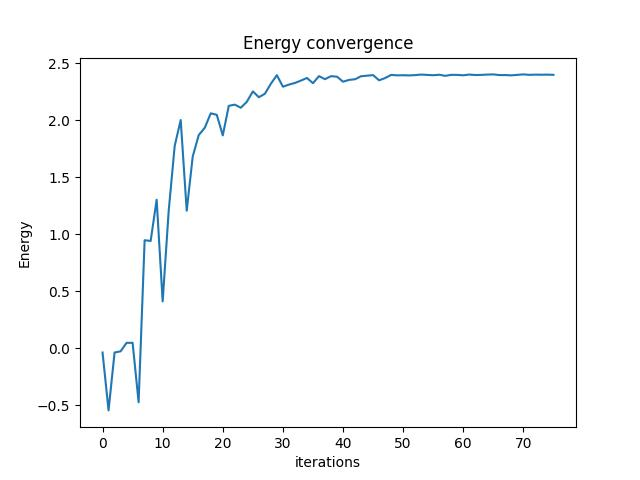

In [14]:
from classiq.execution import VQESolverResult

vqe_result = res[0].value
vqe_result.convergence_graph

array([[<Axes: title={'center': 'cost'}>]], dtype=object)

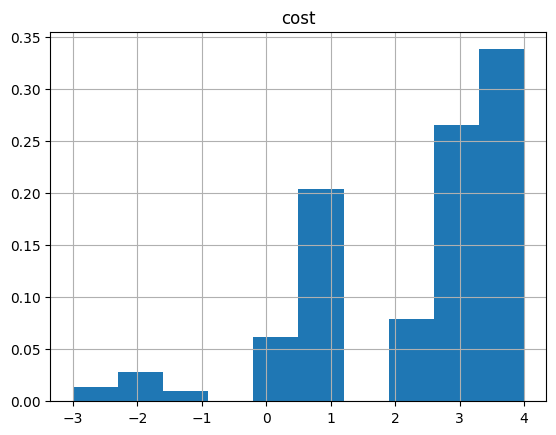

In [15]:
optimization_result.hist("cost", weights=optimization_result["probability"])

In [16]:
idx = optimization_result.cost.idxmax()
print(
    "x =", optimization_result.solution[idx], ", cost =", optimization_result.cost[idx]
)

x = [0, 1, 1, 1, 1] , cost = 4.0


Base on the file or doc

In [23]:

qaoa_model = classiq.models.QAOA(graph)

AttributeError: module 'classiq' has no attribute 'models'

QAOA Circuit and Solving the Problem of Noise model, Brute-force simulations, Tensor network methods

Max Independent Set (MIS) with networkx.star_graph(4), solved by a QAOA Penalty algorithm with three QAOA layers



In [1]:
import networkx as nx
import pyomo.core as pyo


def mis(graph: nx.Graph) -> pyo.ConcreteModel:
    problem = pyo.ConcreteModel("mis")
    problem.x = pyo.Var(graph.nodes, domain=pyo.Binary)

    @problem.Constraint(graph.edges)
    def independent_rule(problem, node1, node2):
        return problem.x[node1] + problem.x[node2] <= 1

    problem.cost = pyo.Objective(expr=sum(list(problem.x.values())), sense=pyo.maximize)

    return problem

In [2]:
import networkx as nx

graph = nx.star_graph(4)
mis_problem = mis(graph)

In [3]:
from classiq.applications.combinatorial_optimization import (
    QAOAConfig,
)
from classiq import construct_combinatorial_optimization_model

qaoa_config = QAOAConfig(num_layers=3)
mis_model = construct_combinatorial_optimization_model(
    pyo_model=mis_problem, qaoa_config=qaoa_config
)

In [4]:
from classiq import synthesize, show

mis_quantum_program = synthesize(mis_model)
show(mis_quantum_program)

The current version of 'classiq' has been deprecated, and will not be supported as of 2024-07-27. Please run "pip install -U classiq" to upgrade the classiq SDK to the latest version.


Opening: https://platform.classiq.io/circuit/bce9b3a8-f42c-4ee4-88a3-692bd04d2c5d?version=0.42.2


In [5]:
from classiq import execute

res = execute(mis_quantum_program).result()

In [6]:
import pandas as pd
from classiq.applications.combinatorial_optimization import (
    get_optimization_solution_from_pyo,
)

vqe_result = res[0].value
solution = get_optimization_solution_from_pyo(
    mis_problem, vqe_result=vqe_result, penalty_energy=qaoa_config.penalty_energy
)
optimization_result = pd.DataFrame.from_records(solution)
optimization_result.sort_values(by="cost", ascending=False).head(5)

,probability,cost,solution,count
1,0.105957,4.0,"[0, 1, 1, 1, 1]",217
11,0.046387,3.0,"[0, 1, 1, 0, 1]",95
7,0.051270,3.0,"[0, 1, 1, 1, 0]",105
9,0.048828,3.0,"[0, 0, 1, 1, 1]",100
10,0.046875,3.0,"[0, 1, 0, 1, 1]",96


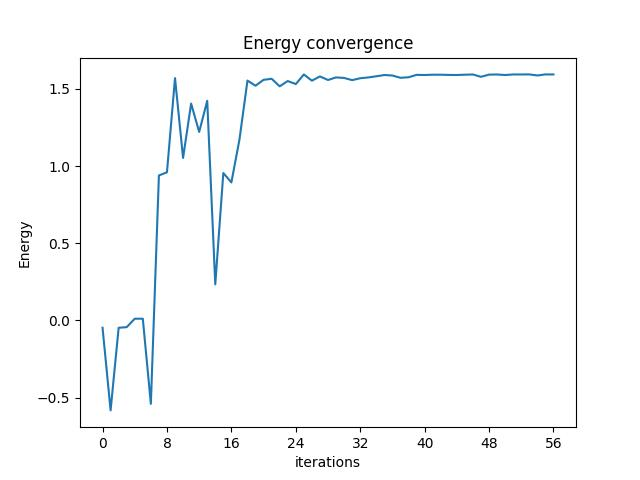

In [7]:
from classiq.execution import VQESolverResult

vqe_result = res[0].value
vqe_result.convergence_graph

In my own view i just wanted to see how to read and interpret noise in a convergence graph is crucial for understanding the performance and stability of optimization algorithms like QAOA. Noise can significantly affect the results, and analyzing its presence can help in diagnosing issues and improving algorithm performance.
1. The convergence graph typically plots the cost function (or loss) value against the number of iterations or optimization steps.
2. Noise can manifest as high-frequency oscillations or variability in the convergence curve. In a noise-free scenario, you would expect the curve to smoothly decrease (or increase) towards the optimum value.
3. Compare the magnitude of the noise to the overall range of the cost function. If the noise level is small compared to the changes in the cost function, it might be less significant. Large noise can obscure the convergence trend.

checking in some papers like: https://www.nature.com/articles/s42254-021-00348-9 and Quantum Computing: An Applied Approach

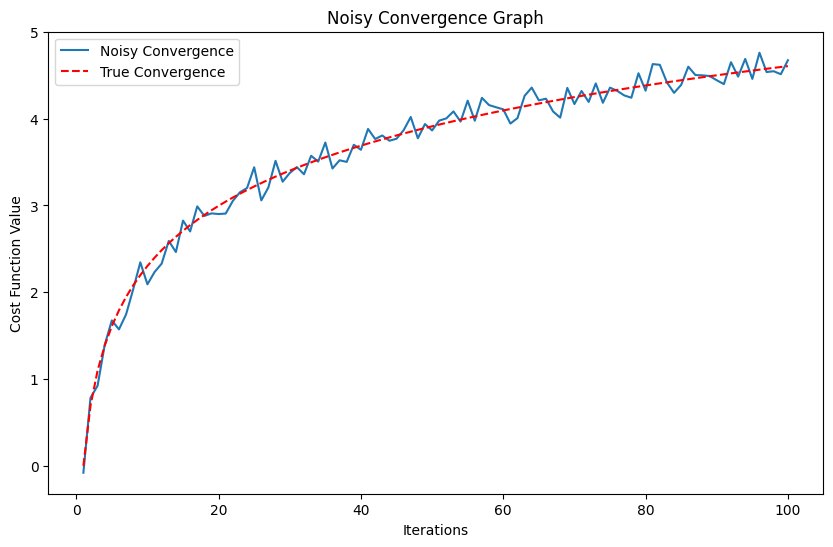

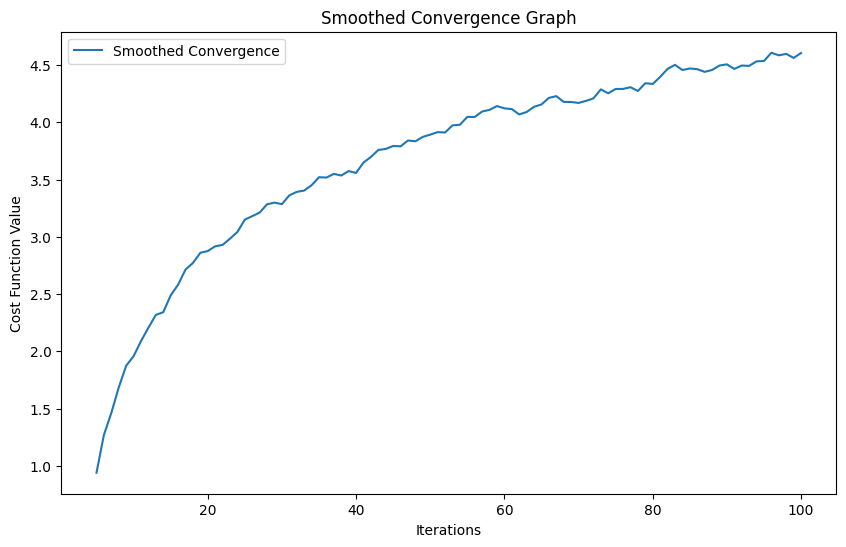

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a noisy convergence curve
iterations = np.arange(1, 101)
true_convergence = np.log(iterations)
noise = np.random.normal(0, 0.1, size=iterations.shape)
noisy_convergence = true_convergence + noise

# Plot the noisy convergence curve
plt.figure(figsize=(10, 6))
plt.plot(iterations, noisy_convergence, label='Noisy Convergence')
plt.plot(iterations, true_convergence, label='True Convergence', linestyle='--', color='red')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Noisy Convergence Graph')
plt.legend()
plt.show()

# Apply smoothing (moving average)
window_size = 5
smoothed_convergence = np.convolve(noisy_convergence, np.ones(window_size)/window_size, mode='valid')

# Plot the smoothed convergence curve
plt.figure(figsize=(10, 6))
plt.plot(iterations[window_size-1:], smoothed_convergence, label='Smoothed Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Smoothed Convergence Graph')
plt.legend()
plt.show()


array([[<Axes: title={'center': 'cost'}>]], dtype=object)

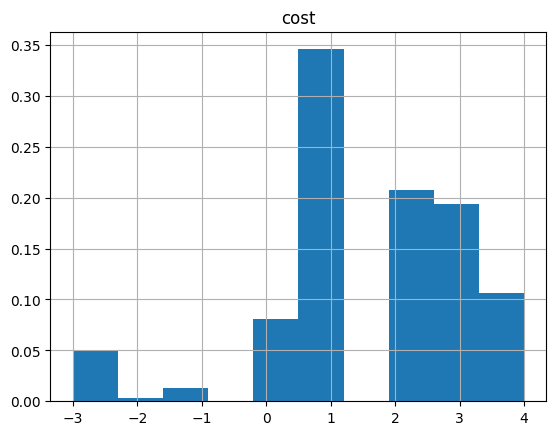

In [9]:
optimization_result.hist("cost", weights=optimization_result["probability"])

In [10]:
idx = optimization_result.cost.idxmax()
print(
    "x =", optimization_result.solution[idx], ", cost =", optimization_result.cost[idx]
)


x = [0, 1, 1, 1, 1] , cost = 4.0
